In [ ]:
import pandas as pd

# Najdemo maksimalno napetost v datoteki 696
def preberi_in_najdi_maks_podatke(pot_do_csv):
    # Najprej ročno odpremo datoteko in odstranimo uvodne vrstice
    with open(pot_do_csv, 'r') as f:
        vrstice = f.readlines()

    # Vse vrstice, kjer je vejica, obdržimo (podatki)
    podatkovne_vrstice = [vrstica for vrstica in vrstice if ',' in vrstica]

    # Pretvorimo v pandas DataFrame
    from io import StringIO
    podatki = pd.read_csv(StringIO(''.join(podatkovne_vrstice)), header=None)

    # Prva vrstica je še vedno glava ("Time", "Voltage"), jo odstranimo
    podatki = podatki.iloc[1:]

    # Nastavimo imena stolpcev
    podatki.columns = ["Time", "Voltage"]

    # Pretvorimo v številke
    podatki = podatki.astype(float)

    # Poiščemo maksimalno napetost
    maks_voltaza = podatki["Voltage"].max()

    return maks_voltaza


ime_datoteke = "pulse_696.csv"  
maks_voltaza = preberi_in_najdi_maks_podatke(ime_datoteke)

print(f"Maksimalna vrednost voltaže je: {maks_voltaza} V")


Maksimalna vrednost voltaže je: 0.110252 V


In [8]:
# Iščemo faktor kalibracije
kal_faktor_696 = 148.0/maks_voltaza
kf_696=int(round(kal_faktor_696))
kf_696

1342

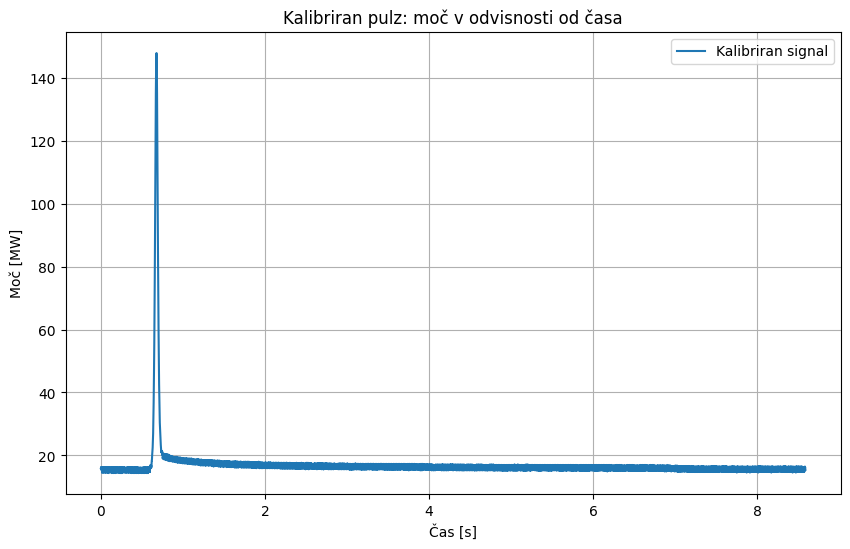

In [ ]:
# Kalibracija 696
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

def preberi_in_kalibriraj(pot_do_csv, kalibracijski_faktor):

    with open(pot_do_csv, 'r') as f:
        vrstice = f.readlines()

    podatkovne_vrstice = [vrstica for vrstica in vrstice if ',' in vrstica]

    podatki = pd.read_csv(StringIO(''.join(podatkovne_vrstice)), header=None)

    podatki = podatki.iloc[1:]

    podatki.columns = ["Time", "Voltage"]

    podatki = podatki.astype(float)

    podatki["Kalibrirana_Voltage"] = podatki["Voltage"] * kalibracijski_faktor

    return podatki

def narisi_graf(podatki):
    # Narišemo graf kalibrirane voltaže glede na čas
    plt.figure(figsize=(10, 6))
    plt.plot(podatki["Time"], podatki["Kalibrirana_Voltage"], label="Kalibriran signal")
    plt.xlabel("Čas [s]")
    plt.ylabel("Moč [MW]")
    plt.title("Kalibriran pulz: moč v odvisnosti od časa")
    plt.legend()
    plt.grid(True)
    plt.show()


ime_datoteke = "pulse_696.csv"

# Preberemo in kalibriramo podatke
podatki = preberi_in_kalibriraj(ime_datoteke, kf_696)

# Narišemo graf
narisi_graf(podatki)

FWHM = 42.47 ms (med 656.45 ms in 698.92 ms)


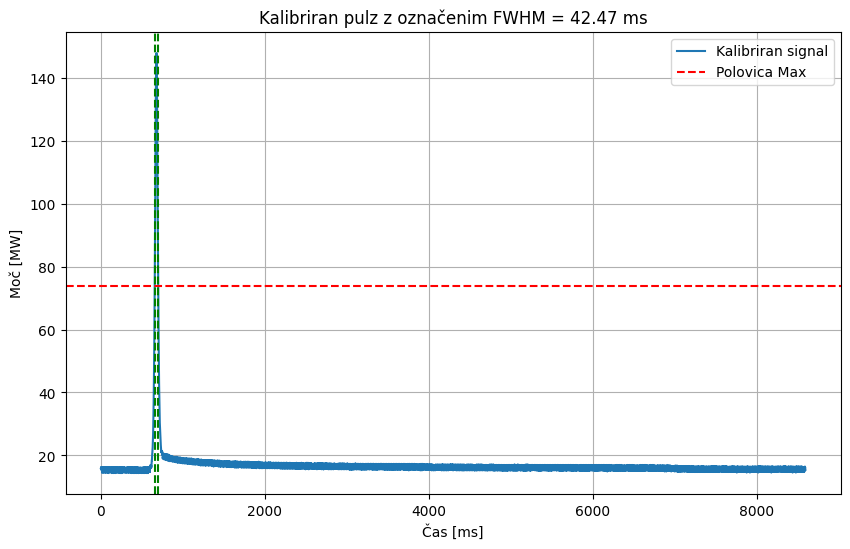

In [10]:
#Full Width of Half Maximum (FWHM) za 696
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import numpy as np

def preberi_in_kalibriraj(pot_do_csv, kalibracijski_faktor):
    with open(pot_do_csv, 'r') as f:
        vrstice = f.readlines()

    podatkovne_vrstice = [vrstica for vrstica in vrstice if ',' in vrstica]

    podatki = pd.read_csv(StringIO(''.join(podatkovne_vrstice)), header=None)

    podatki = podatki.iloc[1:]
    podatki.columns = ["Time", "Voltage"]
    podatki = podatki.astype(float)
    podatki["Kalibrirana_Voltage"] = podatki["Voltage"] * kalibracijski_faktor
    podatki["Time_ms"] = podatki["Time"] * 1000  # Pretvori čas v milisekunde

    return podatki

def najdi_FWHM(podatki):

    max_signal = podatki["Kalibrirana_Voltage"].max()

    half_max = max_signal / 2

    indeksi_nad_half = podatki.index[podatki["Kalibrirana_Voltage"] >= half_max]

    first_index = indeksi_nad_half[0]
    last_index = indeksi_nad_half[-1]

    t1 = podatki.loc[first_index, "Time_ms"]
    t2 = podatki.loc[last_index, "Time_ms"]

    # FWHM je razlika med tema časoma
    fwhm = t2 - t1

    return fwhm, t1, t2

def narisi_graf_FWHM(podatki, fwhm, t1, t2):
    plt.figure(figsize=(10, 6))
    plt.plot(podatki["Time_ms"], podatki["Kalibrirana_Voltage"], label="Kalibriran signal")

    plt.axhline(y=podatki["Kalibrirana_Voltage"].max()/2, color='r', linestyle='--', label='Polovica Max')

    # Označi točki t1 in t2
    plt.axvline(x=t1, color='g', linestyle='--')
    plt.axvline(x=t2, color='g', linestyle='--')

    plt.xlabel("Čas [ms]")
    plt.ylabel("Moč [MW]")
    plt.title(f"Kalibriran pulz z označenim FWHM = {fwhm:.2f} ms")
    plt.legend()
    plt.grid(True)
    plt.show()


ime_datoteke = "pulse_696.csv"

podatki = preberi_in_kalibriraj(ime_datoteke, kf_696)

# Izračunamo FWHM
fwhm, t1, t2 = najdi_FWHM(podatki)

print(f"FWHM = {fwhm:.2f} ms (med {t1:.2f} ms in {t2:.2f} ms)")

# Narišemo graf
narisi_graf_FWHM(podatki, fwhm, t1, t2)


FWHM = 42.47 ms (med 656.45 ms in 698.92 ms)


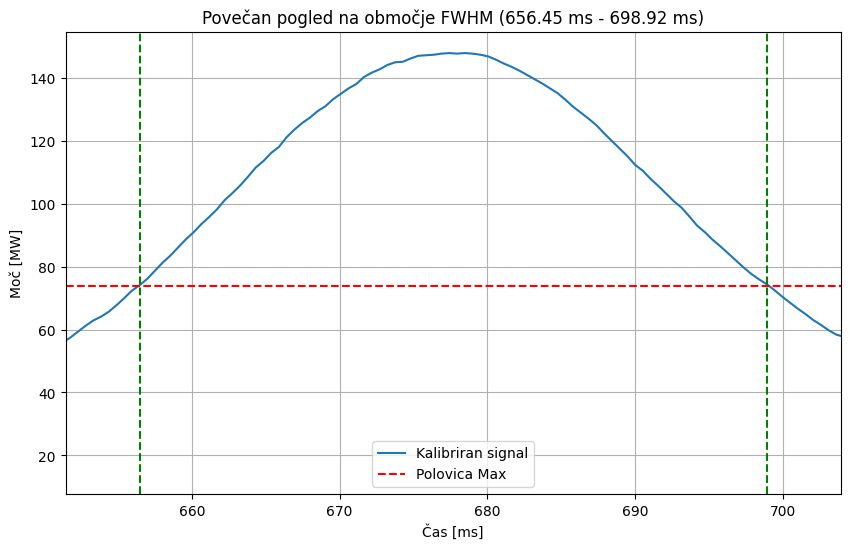

In [ ]:
def narisi_zoom_graf(podatki, t1, t2, margin=5):
    plt.figure(figsize=(10, 6))
    plt.plot(podatki["Time_ms"], podatki["Kalibrirana_Voltage"], label="Kalibriran signal")
    plt.axhline(y=podatki["Kalibrirana_Voltage"].max()/2, color='r', linestyle='--', label='Polovica Max')
    plt.axvline(x=t1, color='g', linestyle='--')
    plt.axvline(x=t2, color='g', linestyle='--')
    plt.xlabel("Čas [ms]")
    plt.ylabel("Moč [MW]")
    plt.title(f"Povečan pogled na območje FWHM ({t1:.2f} ms - {t2:.2f} ms)")
    plt.xlim(t1 - margin, t2 + margin)  
    plt.legend()
    plt.grid(True)
    plt.show()

ime_datoteke = "pulse_696.csv"

podatki = preberi_in_kalibriraj(ime_datoteke, kf_696)

fwhm, t1, t2 = najdi_FWHM(podatki)

print(f"FWHM = {fwhm:.2f} ms (med {t1:.2f} ms in {t2:.2f} ms)")

# Narišemo še povečani (zoom) graf okoli FWHM
narisi_zoom_graf(podatki, t1, t2)

In [ ]:
# Released energy za 696
def izracunaj_released_energy(podatki):
   
    cas_s = podatki["Time"]

    moc_mw = podatki["Kalibrirana_Voltage"]

    released_energy = np.trapz(moc_mw, cas_s)

    return released_energy
    
print(f"Released_energy_696 = {released_energy:.4f} MWs")


released_energy_696 = 145.4223 MWs


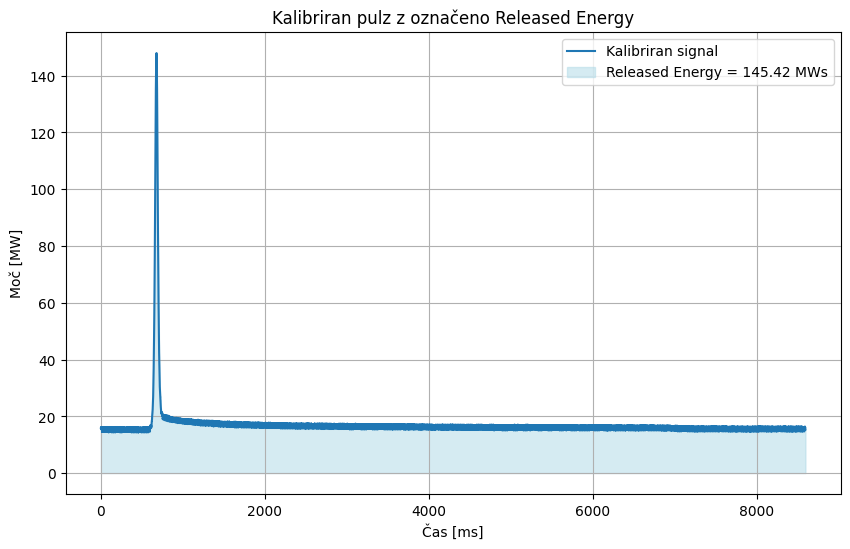

In [21]:
# Graf released energy za 696

import matplotlib.pyplot as plt

def narisi_graf_released_energy(podatki, released_energy):
    plt.figure(figsize=(10, 6))

 
    plt.plot(podatki["Time_ms"], podatki["Kalibrirana_Voltage"], label="Kalibriran signal")

    plt.fill_between(podatki["Time_ms"], 0, podatki["Kalibrirana_Voltage"], 
                     color="lightblue", alpha=0.5, label=f"Released Energy = {released_energy:.2f} MWs")

    plt.xlabel("Čas [ms]")
    plt.ylabel("Moč [MW]")
    plt.title("Kalibriran pulz z označeno Released Energy")
    plt.legend()
    plt.grid(True)
    plt.show()


narisi_graf_released_energy(podatki, released_energy)


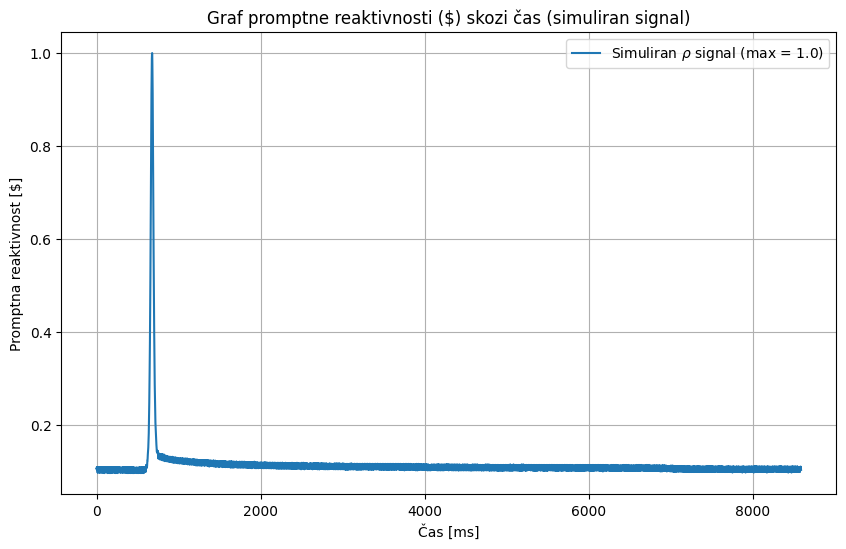

In [24]:
# Graf promptne reaktivnosti skozi čas za 696
import matplotlib.pyplot as plt

def narisi_rho_signal(podatki, rho_vrednost):
    plt.figure(figsize=(10, 6))

    normaliziran_signal = podatki["Kalibrirana_Voltage"] / podatki["Kalibrirana_Voltage"].max()

    rho_signal = normaliziran_signal * rho_vrednost

    plt.plot(podatki["Time_ms"], rho_signal, label=f"Simuliran $\\rho$ signal (max = {rho_vrednost})")

    plt.xlabel("Čas [ms]")
    plt.ylabel("Promptna reaktivnost [$]")
    plt.title("Graf promptne reaktivnosti ($) skozi čas (simuliran signal)")
    plt.legend()
    plt.grid(True)
    plt.show()

rho_vrednost = 1.0  
narisi_rho_signal(podatki, rho_vrednost)


